In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import finpy_tse as tse
import mplfinance as mplf
import scipy.stats as stt
import matplotlib.pyplot as plt
import mahdi as msj

In [9]:
stocks = yf.download("BTC-USD", start="2017-01-01", end="2023-01-01" , interval= "1d")
stocks

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479


In [40]:
import yfinance as yf
tickers  = ["BTC-USD","ETH-USD","XRP-USD"]
n_assets = len(tickers) 

stocks = pd.DataFrame()
for stock_name in tickers:
    # داده های روزانه
    stocks[stock_name] = yf.download(stock_name, start="2020-01-01", end="2023-01-01" , interval= "1d")["Adj Close"]   
    
stocks = round(stocks,4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [41]:
stocks#.tail()

,BTC-USD,ETH-USD,XRP-USD
Date,,,
2019-12-31,7193.5991,129.6109,0.1929
2020-01-01,7200.1743,130.8020,0.1927
2020-01-02,6985.4702,127.4102,0.1880
2020-01-03,7344.8843,134.1717,0.1935
2020-01-04,7410.6567,135.0694,0.1944
...,...,...,...
2022-12-27,16717.1738,1212.7916,0.3681
2022-12-28,16552.5723,1189.9861,0.3565
2022-12-29,16642.3418,1201.5953,0.3428


In [71]:
# محاسبه بازده روزانه
daily_rets = msj.compute_returns(stocks)
daily_rets#.tail()
daily_rets.dropna()

,BTC-USD,ETH-USD,XRP-USD
Date,,,
2020-01-01,0.000914,0.009190,-0.001037
2020-01-02,-0.029819,-0.025931,-0.024390
2020-01-03,0.051452,0.053069,0.029255
2020-01-04,0.008955,0.006691,0.004651
2020-01-05,0.000089,0.008939,0.005658
...,...,...,...
2022-12-27,-0.011976,-0.011559,0.006563
2022-12-28,-0.009846,-0.018804,-0.031513
2022-12-29,0.005423,0.009756,-0.038429


## نکته بسیار مهم

In [72]:
# Annualize returns (periods = 365)
ann_rets = msj.annualize_rets(daily_rets, 365)
round(ann_rets,2)

BTC-USD    0.32
ETH-USD    1.10
XRP-USD    0.21
dtype: float64

In [73]:
# میانگین بازده روزانه و کوواریانس بازده روزانه دو دارایی را محاسبه می کنیم
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,BTC-USD,ETH-USD,XRP-USD
BTC-USD,0.001439,0.001575,0.001400
ETH-USD,0.001575,0.002550,0.001967
XRP-USD,0.001400,0.001967,0.004022


اکنون 4000 پرتفوی را با وزن های تخصیص یافته به سهام فوق شبیه سازی می کنیم:

In [83]:
periods_per_year = 365
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0

In [84]:
for i in range(num_portfolios):
    # انتخاب وزن های تصادفی به تعداد دارایی ها
    weights = np.random.random(n_assets)
    # حال جوری تنظیمشان میکنیم که جمعشان 1 شود
    weights /= np.sum(weights)
    
    # بازده سالانه پرتفوی
    ann_rets = msj.annualize_rets(daily_rets, periods_per_year)
    portfolio_ret = msj.portfolio_return(weights, ann_rets)        

    # نوسانات سالانه پرتفوی
    portfolio_vol = msj.portfolio_vol(weights, cov_rets)
    portfolio_vol = msj.annualize_vol(portfolio_vol, periods_per_year)

    # نسبت شارپ سالانه پرتفوی
    portfolio_shpr = msj.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)
    
    # create dataframe   
    portfolios = portfolios.append( {"return":portfolio_ret, 
                                     "volatility":portfolio_vol, 
                                     "sharpe ratio":portfolio_shpr, 
                                     "w1": weights[0], "w2": weights[1], "w3": weights[2]}, 
                                     ignore_index=True)

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append( {"return":portfolio_ret,
C:\Users\Lenovo L3\AppData\Local\Temp\ipykernel_6812\2031877926.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portf

In [85]:
portfolios.head()

,return,volatility,sharpe ratio,w1,w2,w3
0,0.492177,1.038356,0.473997,0.006062,0.32003,0.673909
1,0.682623,0.958364,0.71228,0.023278,0.532402,0.44432
2,0.573973,0.843036,0.68084,0.340597,0.369973,0.28943
3,0.631381,0.876325,0.720487,0.230029,0.448594,0.321377
4,0.591216,0.778947,0.758994,0.591002,0.357809,0.051188


In [86]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   return        4000 non-null   object
 1   volatility    4000 non-null   object
 2   sharpe ratio  4000 non-null   object
 3   w1            4000 non-null   object
 4   w2            4000 non-null   object
 5   w3            4000 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [87]:
portfolios["return"] = pd.to_numeric(portfolios["return"])
portfolios["volatility"] = pd.to_numeric(portfolios["volatility"])
portfolios["sharpe ratio"] = pd.to_numeric(portfolios["sharpe ratio"])
portfolios["w1"] = pd.to_numeric(portfolios["w1"])
portfolios["w2"] = pd.to_numeric(portfolios["w2"])
portfolios["w3"] = pd.to_numeric(portfolios["w3"])

In [88]:
portfolios["volatility"].argmin()

1531

In [89]:
portfolios.iloc[portfolios["volatility"].argmin()]

return          0.340170
volatility      0.726833
sharpe ratio    0.468017
w1              0.951665
w2              0.029500
w3              0.018836
Name: 1531, dtype: float64

In [90]:
portfolios["sharpe ratio"].argmax()

2064

In [91]:
portfolios.iloc[portfolios["sharpe ratio"].argmax()]

return          1.052455
volatility      0.946374
sharpe ratio    1.112092
w1              0.045293
w2              0.946253
w3              0.008454
Name: 2064, dtype: float64

In [92]:
portfolios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   return        4000 non-null   float64
 1   volatility    4000 non-null   float64
 2   sharpe ratio  4000 non-null   float64
 3   w1            4000 non-null   float64
 4   w2            4000 non-null   float64
 5   w3            4000 non-null   float64
dtypes: float64(6)
memory usage: 187.6 KB


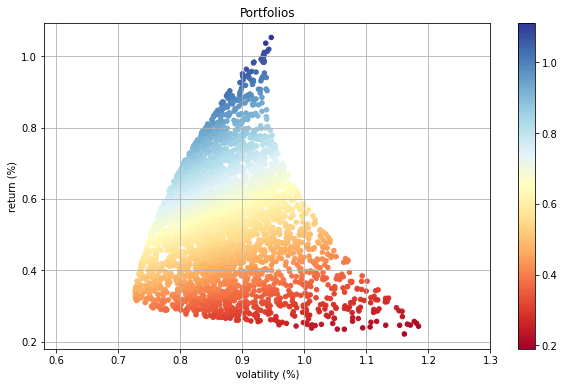

In [94]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios")
ax.set_ylabel("return (%)")
ax.grid()


ax.set_xlim([0.58,1.3])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()

In [95]:
# یافتن پرتفو با پایین ترین ریسک
low_vol_portfolio = portfolios.iloc[ portfolios["volatility"].idxmin() ]
print(36 * "-")
print("Global Minimum Volatility portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# یافتن پرتفو با بالا ترین نسبت شارپ
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print(36 * "-")
print("Maximum Sharpe Ratio portfolio:")
print(36 * "-")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

------------------------------------
Global Minimum Volatility portfolio:
------------------------------------
- return      : 34.02%
- volatility  : 72.68%
- sharpe ratio: 0.47
------------------------------------
Maximum Sharpe Ratio portfolio:
------------------------------------
- return      : 105.25%
- volatility  : 94.64%
- sharpe ratio: 1.11


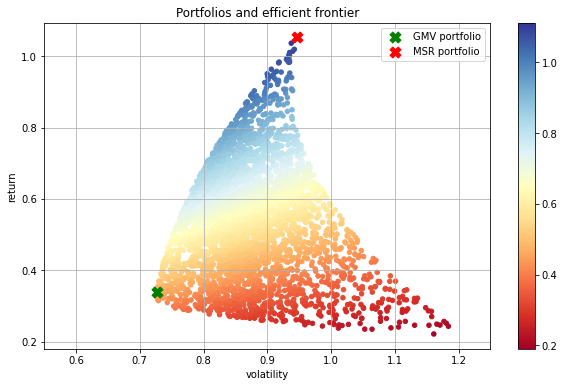

In [98]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# مشخص کردن دو نقطه حساس ما در نمودار
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0.55,1.25])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

In [99]:
optimal_weights = msj.minimize_volatility(ann_rets, cov_rets, 0.5)
print("optimal weights:")
print(22*"-")
print("  BTC: {:.2f}%".format(optimal_weights[0]*100))
print("  ETH: {:.2f}%".format(optimal_weights[1]*100))
print("  XRP: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  BTC: 76.72%
  ETH: 23.28%
  XRP: 0.00%


In [101]:
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate = 0.24, periods_per_year = 365)
print("optimal weights:")
print(22*"-")
print("  BTC: {:.2f}%".format(optimal_weights[0]*100))
print("  ETH:   {:.2f}%".format(optimal_weights[1]*100))
print("  XRP: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
----------------------
  BTC: 0.00%
  ETH:   100.00%
  XRP: 0.00%


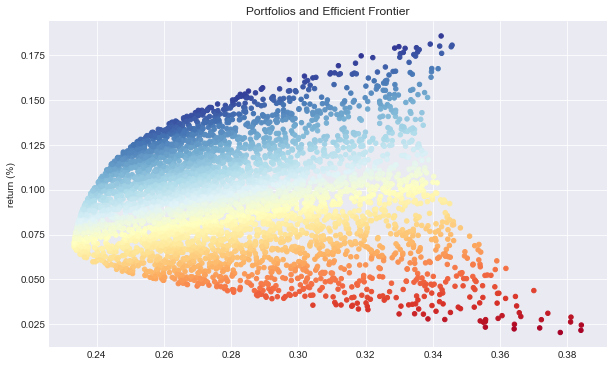

In [91]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()


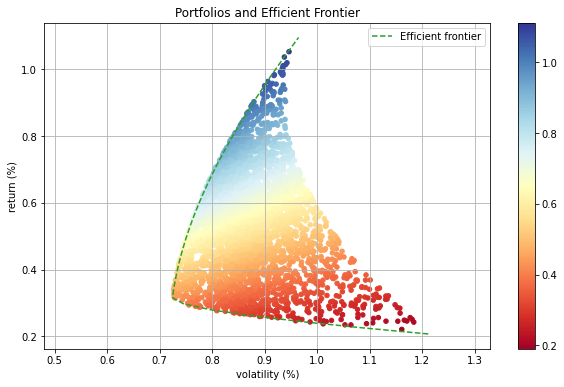

In [104]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and Efficient Frontier")
ax.set_ylabel("return (%)")
ax.grid()

# رسم مرز کارا
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="tab:green", ax=ax, grid=True, label="Efficient frontier")
ax.set_xlim([0.48,1.33])
ax.set_xlabel("volatility (%)")

fig.colorbar(im, ax=ax)
plt.show()

In [105]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    # portfolio volatility
    vol = msj.portfolio_vol(weights, covmat)
    vol = msj.annualize_vol(vol, periods_per_year)

    # portfolio return
    ret = msj.portfolio_return(weights, rets)

    # portfolio sharpe ratio
    shp = msj.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

Portfolio return:       109.51%
Portfolio volatility:   96.47%
Portfolio sharpe ratio: 1.14


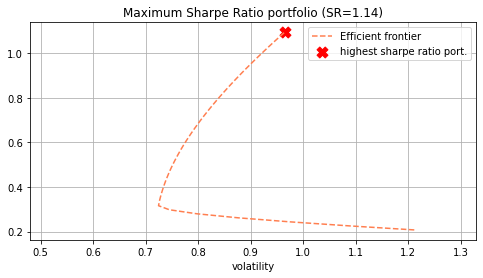

In [107]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# رسم مرز کارا
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = msj.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highest sharpe ratio port.")
ax.set_xlim([0.48,1.33])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio (SR={:.2f})".format(shp))
plt.show()

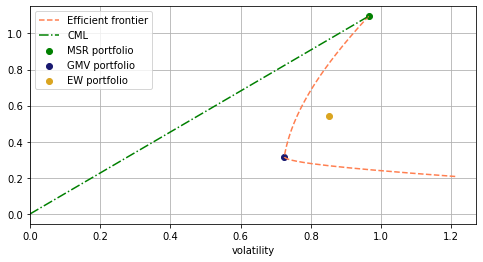

In [109]:
df = msj.efficient_frontier(150, daily_rets, cov_rets, periods_per_year , iplot = True , hsr = True , cml = True , mvp = True , ewp = True)

#### یافتن پرتفوی بهینه: نسبت شارپ را با توجه به نوسانات(ریسک) ثابت به حداکثر برسانید

مشابه آنچه قبلاً انجام داده‌ایم، می‌توانیم (در مرز کارا) به بالاترین نسبت شارپ برای یک سطح مشخص از نوسان دست پیدا کنیم. در این مورد، ما به سادگی یک محدودیت در مسئله کمینه سازی اضافه می کنیم:
$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$
subject to 
$$
\begin{cases}
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} = \sigma_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$
$\sigma_0$ ===> همان نسبت ثابتی از میزان ریسک است

به عنوان مثال ما سطح نوسان ثابت 20 درصد برایمان هدف است

In [111]:
ity = 0.20
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year, target_volatility=ity)

print("  BTC: {:.2f}%".format(optimal_weights[0]*100))
print("  ETH:   {:.2f}%".format(optimal_weights[1]*100))
print("  XRP: {:.2f}%".format(optimal_weights[2]*100))

  BTC: 98.56%
  ETH:   0.00%
  XRP: 1.44%


In [112]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       31.78%
Portfolio volatility:   72.45%
Portfolio sharpe ratio: 0.44


In [113]:
risk_free_rate = 0.24
optimal_weights = msj.maximize_sharpe_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print("  BTC: {:.2f}%".format(optimal_weights[0]*100))
print("  ETH:   {:.2f}%".format(optimal_weights[1]*100))
print("  XRP: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  BTC: 0.00%
  ETH:   100.00%
  XRP: 0.00%


In [114]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       109.51%
Portfolio volatility:   96.47%
Portfolio sharpe ratio: 0.89


اجازه دهید مرز کارا و خط بازار سرمایه را با استفاده از مولفه های بهینه  در نمودار خود رسم کنیم:

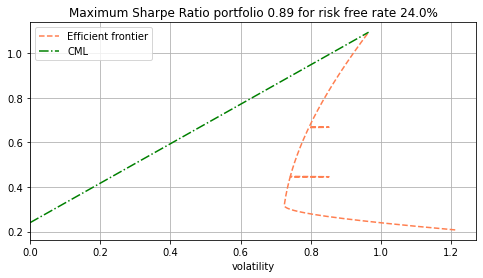

In [118]:
df, ax = msj.efficient_frontier(540, daily_rets, cov_rets, periods_per_year=365, risk_free_rate=risk_free_rate, 
                                iplot=True, cml=True)
ax.set_title("Maximum Sharpe Ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

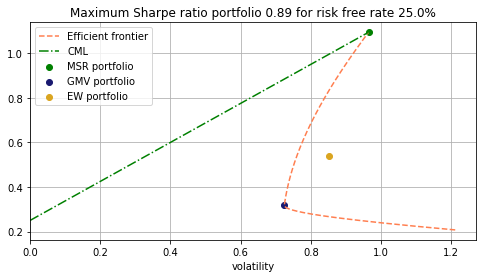

In [119]:
risk_free_rate = 0.25
df, ax = msj.efficient_frontier(490, daily_rets, cov_rets, periods_per_year=365, risk_free_rate=risk_free_rate, 
                                iplot=True, hsr=True, cml=True, mvp=True, ewp=True)
ax.set_title("Maximum Sharpe ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

In [120]:
df.tail()

,0,1,2,3,4,5
488,0.963831,1.093277,0.874922,2.340211e-03,0.997660,2.220446e-16
489,0.964694,1.095092,0.876022,9.627316e-10,1.000000,5.551115e-17
490,0.964694,1.095092,0.876022,0.000000e+00,1.000000,1.387779e-16
491,0.724495,0.317957,0.093799,9.871421e-01,0.000000,1.285787e-02
492,0.851916,0.540635,0.341155,3.333333e-01,0.333333,3.333333e-01


### با نرخ بدون ریسک

$$
\mathbf{w}^* 
= \underbrace{ \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }_{:= r} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})
= r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}).
$$

In [132]:
target_ret = 0.40
wstar = (target_ret - risk_free_rate) / np.dot(r_rf, np.dot(invcov,r_rf)) * np.dot(invcov,r_rf)             
wstar

array([-0.16060143,  0.18875162, -0.03833991])

#### همانطور که میبینیم جمعشان یک نمی شود زیرا دارایی بدون ریسک را که هنوز لحاظ نکردیم

پس به این وزن ها باید وزن دارایی بدون ریسک را نیز اضافه کنیم

In [133]:
np.append( wstar, 1-wstar.sum() )

array([-0.16060143,  0.18875162, -0.03833991,  1.01018972])

آخرین وزن در دارایی بدون ریسک است.

بازده چنین پورتفولیو طبق تعریف برابر با بازده هدف است:

In [139]:
# portfolio_volatility method
msj.annualize_vol( msj.portfolio_vol(wstar, cov_rets), periods_per_year)

0.09952077810058595